In [1]:
try:
    import convml_tt
except ImportError:
    import sys
    # update the path where convml_tt is stored below
    sys.path.append('../../')

from pathlib import Path

from convml_tt.architectures.triplet_trainer import NPMultiImageItemList, loss_func, monkey_patch_fastai
import fastai.vision

In [2]:
monkey_patch_fastai()

In [3]:
from convml_tt.data.examples import ExampleData
from fastai.datasets import untar_data

path = untar_data(ExampleData.SMALL100)

tile_path = path/"train"

In [4]:
item_list = NPMultiImageItemList.from_folder(path=tile_path)
len(item_list)

200

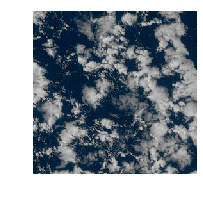

In [5]:
item_list.get(2)[2].show()

In [6]:
src  = (item_list       
        .split_by_rand_pct()
        .label_empty()
       )

data = (src
        .transform(fastai.vision.get_transforms(flip_vert=True,))
        .databunch(bs=50)
        .normalize(fastai.vision.imagenet_stats)
       )

In [7]:
learn = fastai.vision.cnn_learner(data=data, base_arch=fastai.vision.models.resnet18, loss_func=loss_func)

In [15]:
learn.lr_find()

learn.recorder.plot()

In [12]:
learn.fit_one_cycle(cyc_len=10, max_lr=4.0e-2)

In [16]:
learn.export("models/stage-1.pkl")